# Small Town, Better Yelp Reviews?

# Overview

For our project, we have analyzed Yelp’s open source data to determine whether or not location and population size of the area impacts Yelp ratings. To keep our data consistent, we have compared reviews among the top 10 restaurant chains in the United States. These chains are McDonalds, Starbucks, Subway, Burger King, Taco Bell, Wendy’s, Dunkin’ Donuts, Chick-Fil-A, Domino’s, and Pizza Hut. We have compared Yelp star review ratings within these different chains respectively from zip code locations across the country. In our findings, there was no correlation between location population, density, number of reviews, and the name of the chain and numerical value of Yelp star ratings. We created a predictive linear regression model from the location and review data. This model was not able to make accurate or significant predictions based off of population data. Therefore, we have retained the null hypothesis and concluded that population size and density of the location does not have a significant impact of Yelp ratings.

# Names

Rakesh Senthilvelan 

Kayla Monnette 

Jason Yoo 

Fion Quach 

# Research Question

"Given data from Yelp with ratings for top 10 chain restaurants based on location, can we predict the rating a chain will receive based on population, population density, restaurant name, and review counts?”

# Background and Prior Work

This project was inspired by personal observations. As UCSD students, we noticed a lot of chain restaurants has higher ratings in La Jolla than in their San Diego and surrounding area counterparts. Stranger yet, after sharing our personal recollections of visiting different chain restaurants, we agreed that we hadn’t noticed any substantial differences in service or food quality between chain locations. However, we had noticed cases where a lot of traffic to a restaurant under the same chain resulted in worse service. For example, trying get the Travis Scott meal when the drive-thru at McDonald's was stretching down the street in the highly populated Costa Verde area anecdotally resulted in worse quality food and service compared to getting an equivalent burger on a less crowded day at a different McDonald's in a much less population dense town in New Jersey. This prompted the question - could a restaurant’s location, specifically in relation to population, positively or negatively influence Yelp ratings? 

We researched what work data scientists have been doing in regards to Yelp, and found some interesting projects. One anonymous Data Science blogger named Ahoulette has created an algorithm to analyze Yelp reviews and predict whether they are positive or negative based off of their text [1]. We found another data project from Stanford where they analyzed users’ previous ratings to predict the numerical star value of their current rating [2]. Most of the current Yelp data projects cover the similar notion of predicting future ratings based off of the text content data from Yelp users’ reviews. Although our project takes a different angle by looking at the outside factor of location, looking at prior work related to Yelp reviews was helpful because our research solidified one important notion: that Yelp reviews are in fact predictable, and are influenced by outside factors other than restaurants’ quality of food and service. 

***References***

[1] Alhoulette Predicting Yelp Review Connotations Data Project:
https://www.kaggle.com/athoul01/predicting-Yelp-ratings-from-review-text

[2] Stanford Predicting Yelp Star Ratings Based off Previous User Reviews Data Project: 
http://cs229.stanford.edu/proj2014/Chen%20Li,%20Jin%20Zhang,%20Prediction%20of%20Yelp%20Review%20Star%20Rating%20using%20Sentiment%20Analysis.pdf


# Hypothesis

Null Hypothesis: Based on the population, population density, chain name, and review count in the different areas of the United States, there is no significant impact on the average ratings for the top 10 largest chain restaurants. We believe that this null hypothesis would indicate that chains are rated more or less the same even though the populations of each franchise is different. 

Alternative hypothesis: Based on population, population density, chain name, and review count in the different areas of the United States, there is a significant impact on the average ratings for the top 10 largest chain restaurants. We believe that this can be backed up on arguments that population in area can directly affect certain aspects of a customer's experience such as wait times and the rushing of preparing the food which can affect the ratings.

# Datasets

Our ideal dataset would have been a datset with all of the locations of the top 10 fast food chains in the country with matching population and population density data to go with it. Unfortunately, such a dataset did not exist so we had to find datasets that would help us get close to our ideal dataset target. Our plan was to find Yelp review data and filter it down to the restaurant chains we wanted to look at, find a population dataset that gave us the features we wanted, the merge the two based on Zip Code in order to create a data frame similar in structure to our ideal dataset.

The first dataset we looked at was a Yelp dataset avaliable on Kaggle which was a compliation of yelp reviews containing the reviews, the name of business the review was for, the zip code of the business, city, state, latitude, longitude, the amount of that specific stars for that restaurant. This dataset will provide information on the Yelp reviews based on the location. The reviews from a total of 5,200,000 users, information on 174,000 businesses in 11 metropolitan areas. Since it already counts reviews of the specific number of stars in this dataset there is 209389 entries.

The second dataset we will be looking at will be from SimpleMaps where it complies the data of population and population density based off of Zip Code. This dataset will help get our population and population density data for the locations of each of the chain restaurants. Using the zip code column from each dataset will allow us to easily merge the data we need for the scope of this project. Below, you will find the sources for each of our datasets.

Yelp Dataset : https://www.kaggle.com/yelp-dataset/yelp-dataset

Population by Zip Code Dataset : https://simplemaps.com/data/us-zips

Disclaimer: The Yelp dataset was in excess of 3 gigabytes. As a result, we were unable to store it in the Github repo. If you want to run this notebook with the data, please download the datasets from the links above and have them in the same directory as this notebook.

# Loading in the Data

In [1]:
import pandas as pd
import numpy as np

# First, we will load in the datasets we are using.

In [2]:
# Business data with location, name, id, number of reviews, Yelp rating, categories, hours, and is open
bus_df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
bus_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,0,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Department Stores, Food, Mobile Phones, Fashio...",None
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","American (New), Food, Burgers, Restaurants, Fa...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,,Indian Trail,NC,28079,35.101965,-80.599385,5.0,3,1,None,"Pet Services, Pet Training, Pets","{'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '..."


In [3]:
# Not necessary
check_df = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)
check_df

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."
...,...,...
175182,zzvlwkcNR1CCqOPXwuvz2A,"2017-05-06 20:05:15, 2017-05-12 22:37:03, 2017..."
175183,zzwaS0xn1MVEPEf0hNLjew,"2010-02-16 02:09:56, 2010-07-05 05:40:48, 2010..."
175184,zzwhN7x37nyjP0ZM8oiHmw,"2016-03-06 13:27:02, 2016-03-09 00:41:53, 2016..."
175185,zzwicjPC9g246MK2M1ZFBA,"2012-09-22 00:26:15, 2012-09-23 20:12:00, 2012..."


In [4]:
#Population data
pop_df = pd.read_csv('pop-by-zip-code.csv',dtype={'zip_code':'str'})
pop_df

,zip_code,y-2016,y-2015,y-2014,y-2013,y-2012,y-2011,y-2010,aggregate
0,00601,17800,17982,18088,18450,18544,18533,18570,127967
1,00602,39716,40260,40859,41302,41640,41930,41520,287227
2,00603,51565,52408,53162,53683,54540,54475,54689,374522
3,00606,6320,6331,6415,6591,6593,6386,6615,45251
4,00610,27976,28328,28805,28963,29141,29111,29016,201340
...,...,...,...,...,...,...,...,...,...
33115,99923,0,13,12,81,77,116,87,386
33116,99925,908,826,728,668,673,689,819,5311
33117,99926,1667,1711,1622,1630,1624,1488,1460,11202
33118,99927,81,123,131,111,75,67,94,682


# Data Cleaning

# Now, we will prepare the data for our project.

Clean data to remove all Canadian locations. We'll be using U.S. locations for this project.
For this, we will get the dataframe to only have cases with a 5-digit postal code.

In [5]:
bus_df = bus_df[bus_df['postal_code'].str.contains(r'^\d{5}$')]
bus_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209385,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza, Sandwiches, Fast Food, Chi...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'..."
209386,JjcJVqhZXhP4tvOhg3fnag,Water Heater Pros,,Las Vegas,NV,89120,36.076977,-115.244794,5.0,217,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Contractors, Local Services, Appliances & Repa...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,0,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Department Stores, Food, Mobile Phones, Fashio...",None
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","American (New), Food, Burgers, Restaurants, Fa...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


## We need to find out which names need to be standardized.

We will select the top 10 fast food chains and some extras for our analysis. But first, let's explore our dataset to
make sure we're getting the way the names are inputted correctly. For example, Domino's Pizza is listed as just
Domino's in this dataset. We notice that with Subway, some are called Subway Restaurants and some are just Subway. We will standardize this. Dunkin' also needs to be standardized as some are Dunkin',some are Dunkin' Donuts, some are with Baskin-Robbins. Chick-fil-A needs to be standardized. Some Domino's are just Domino's while some are Domino's Pizza. This also needs to be standardized.

In [6]:
mcd = bus_df[bus_df['name'].str.contains("McDonald")]
starb = bus_df[bus_df['name'].str.contains("Starbucks")]

sub = bus_df[bus_df['name'].str.contains("Subway")]

bk = bus_df[bus_df['name'].str.contains("Burger King")]
tb = bus_df[bus_df['name'].str.contains("Taco Bell")]
wendys = bus_df[bus_df['name'].str.contains("Wendy")]

dunkin = bus_df[bus_df['name'].str.contains("Dunkin")]

cfa = bus_df[bus_df['name'].str.contains("Chick-")]

domino = bus_df[bus_df['name'].str.contains("Domino")]

pizza_hut = bus_df[bus_df['name'].str.contains("Pizza Hut")]

In [7]:
# Just for reference, this is what Dunkin' entries looked like.
bus_df[bus_df['name'].str.contains("Dunkin")]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
340,HccqNuvwDCrnAAM5e5lQ_w,Dunkin',4125 S Eastern Ave,Las Vegas,NV,89119,36.113742,-115.119507,2.5,76,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Coffee & Tea, Donuts, Food, Bakeries","{'Monday': '5:0-18:0', 'Tuesday': '5:0-18:0', ..."
533,rljaZWpdhJfrWAPT6kYb7g,Dunkin' Donuts/Baskin-Robbins,21015 Lorain Rd,Fairview Park,OH,44126,41.445915,-81.853363,3.0,15,1,"{'OutdoorSeating': 'True', 'BusinessParking': ...","Ice Cream & Frozen Yogurt, Coffee & Tea, Donut...",None
785,QZ-BhQotj-mSpTyse35udA,Dunkin',10240 N 90th St,Scottsdale,AZ,85258,33.579467,-111.886979,2.5,61,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Donuts, Food, Coffee & Tea","{'Monday': '4:0-21:0', 'Tuesday': '4:0-21:0', ..."
1053,uJIIgBmcIn-Ye-anrqK0DQ,Dunkin',1302 N. Prospect Ave,Champaign,IL,61820,40.128653,-88.257411,2.0,18,1,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Donuts, Food, Coffee & Tea","{'Monday': '5:0-19:0', 'Tuesday': '5:0-19:0', ..."
3480,rd9DTyWkLAUr1z189DMj5w,Dunkin',5029 Beatties Ford Rd,Charlotte,NC,28216,35.304564,-80.858557,2.0,15,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Coffee & Tea, Donuts, Food","{'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198294,r3kFRJuy7CTxamZycndqGw,Dunkin',"7430 Las Vegas Blvd, Ste 100",Las Vegas,NV,89123,36.054565,-115.171491,3.0,212,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Donuts, Coffee & Tea, Food","{'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ..."
200523,92UwiPi_dOQfCP9dxhOeQQ,Dunkin',6751 E. Wilkinson Blvd,Belmont,NC,28012,35.252260,-81.029012,2.5,18,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Food, Coffee & Tea, Donuts","{'Monday': '5:0-22:0', 'Tuesday': '5:0-22:0', ..."
203264,50tjBMTlIbFBxjTRXAVZHQ,Dunkin',"6935 N Durango Dr, Ste 150",Las Vegas,NV,89149,36.285821,-115.288547,2.0,132,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Bagels, Donuts, Food","{'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ..."
204663,ylLChdh7Oyx3SW8SxOTlbA,Dunkin' Donuts,411 Smithfield St,Pittsburgh,PA,15222,40.439093,-79.999581,4.5,3,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Donuts, Food, Coffee & Tea","{'Monday': '6:0-19:0', 'Tuesday': '6:0-19:0', ..."


Now, it's time to standardize these.

In [8]:
def standardize_restaurant(string):
    temp = string.lower()
    if "mcdonald" in temp:
        output = "McDonald's"
    elif "starbucks" in temp:
        output = "Starbucks"
    elif "subway" in temp:
        output = "Subway"
    elif "burger king" in temp:
        output = "Burger King"
    elif "taco bell" in temp:
        output = "Taco Bell"
    elif "wendy" in temp:
        output = "Wendy's"
    elif "dunkin" in temp:
        output = "Dunkin'"
    elif "chick-" in temp:
        output = "Chick-fil-A"
    elif "domino" in temp:
        output = "Domino's"
    elif "pizza hut" in temp:
        output = "Pizza Hut"
    else:
        output = string
    return output

In [9]:
bus_df['name'] = bus_df['name'].apply(standardize_restaurant)

/Users/rakesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now let's see how this worked on Domino's.

In [10]:
bus_df[bus_df['name'].str.contains("Dunkin")]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
340,HccqNuvwDCrnAAM5e5lQ_w,Dunkin',4125 S Eastern Ave,Las Vegas,NV,89119,36.113742,-115.119507,2.5,76,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Coffee & Tea, Donuts, Food, Bakeries","{'Monday': '5:0-18:0', 'Tuesday': '5:0-18:0', ..."
533,rljaZWpdhJfrWAPT6kYb7g,Dunkin',21015 Lorain Rd,Fairview Park,OH,44126,41.445915,-81.853363,3.0,15,1,"{'OutdoorSeating': 'True', 'BusinessParking': ...","Ice Cream & Frozen Yogurt, Coffee & Tea, Donut...",None
785,QZ-BhQotj-mSpTyse35udA,Dunkin',10240 N 90th St,Scottsdale,AZ,85258,33.579467,-111.886979,2.5,61,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Donuts, Food, Coffee & Tea","{'Monday': '4:0-21:0', 'Tuesday': '4:0-21:0', ..."
1053,uJIIgBmcIn-Ye-anrqK0DQ,Dunkin',1302 N. Prospect Ave,Champaign,IL,61820,40.128653,-88.257411,2.0,18,1,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Donuts, Food, Coffee & Tea","{'Monday': '5:0-19:0', 'Tuesday': '5:0-19:0', ..."
3480,rd9DTyWkLAUr1z189DMj5w,Dunkin',5029 Beatties Ford Rd,Charlotte,NC,28216,35.304564,-80.858557,2.0,15,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Coffee & Tea, Donuts, Food","{'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198294,r3kFRJuy7CTxamZycndqGw,Dunkin',"7430 Las Vegas Blvd, Ste 100",Las Vegas,NV,89123,36.054565,-115.171491,3.0,212,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Donuts, Coffee & Tea, Food","{'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ..."
200523,92UwiPi_dOQfCP9dxhOeQQ,Dunkin',6751 E. Wilkinson Blvd,Belmont,NC,28012,35.252260,-81.029012,2.5,18,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Food, Coffee & Tea, Donuts","{'Monday': '5:0-22:0', 'Tuesday': '5:0-22:0', ..."
203264,50tjBMTlIbFBxjTRXAVZHQ,Dunkin',"6935 N Durango Dr, Ste 150",Las Vegas,NV,89149,36.285821,-115.288547,2.0,132,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Bagels, Donuts, Food","{'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ..."
204663,ylLChdh7Oyx3SW8SxOTlbA,Dunkin',411 Smithfield St,Pittsburgh,PA,15222,40.439093,-79.999581,4.5,3,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Donuts, Food, Coffee & Tea","{'Monday': '6:0-19:0', 'Tuesday': '6:0-19:0', ..."


Beyond this, we will add in new data that goes further into the population data, exploring concepts such as
population density and population count by zip code. 

In [11]:
demo_df = pd.read_csv('uszips.csv', dtype = {'zip':'str'})
demo_df

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,00601,18.18004,-66.75218,Adjuntas,PR,Puerto Rico,True,NaN,17242,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,00602,18.36073,-67.17517,Aguada,PR,Puerto Rico,True,NaN,38442,523.5,72003,Aguada,{'72003':100},Aguada,72003,False,False,America/Puerto_Rico
2,00603,18.45439,-67.12202,Aguadilla,PR,Puerto Rico,True,NaN,48814,667.9,72005,Aguadilla,{'72005':100},Aguadilla,72005,False,False,America/Puerto_Rico
3,00606,18.16724,-66.93828,Maricao,PR,Puerto Rico,True,NaN,6437,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,00610,18.29032,-67.12243,Anasco,PR,Puerto Rico,True,NaN,27073,312.0,72011,Añasco,"{'72003':0.55,'72011':99.45}",Añasco|Aguada,72011|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33092,99923,55.97796,-130.03671,Hyder,AK,Alaska,True,NaN,15,2.1,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka
33093,99925,55.55767,-132.97627,Klawock,AK,Alaska,True,NaN,927,5.7,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka
33094,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1635,4.2,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Metlakatla
33095,99927,56.25100,-133.37571,Point Baker,AK,Alaska,True,NaN,38,0.2,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka


Now we will merge the dataframes together

In [12]:
merge_df = demo_df[['zip','population','density']]
bus_df = bus_df.rename(columns={"postal_code":"zip"})
df = bus_df.merge(merge_df, how='left', on='zip')

Now let's reduce this dataframe to just the restaurants chains we're examining.

In [13]:
chains = ["McDonald's", "Starbucks", "Subway", "Burger King", "Taco Bell", "Wendy's", "Dunkin'", "Chick-fil-A",
         "Domino's","Pizza Hut"]
df = df[df['name'].isin(chains)]
df

,business_id,name,address,city,state,zip,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,population,density
36,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Fast Food, Burgers","{'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ...",28790.0,1344.6
72,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131,36.307495,-115.279059,2.5,37,1,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Fast Food, Restaurants",None,48710.0,1037.2
200,CfwrsG76Wm4iLS22v_wAcg,McDonald's,6421 Pearl Rd,Parma Heights,OH,44130,41.385949,-81.768113,2.5,15,1,"{'Ambience': '{'romantic': False, 'intimate': ...","Restaurants, Coffee & Tea, Burgers, Fast Food,...","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ...",49787.0,1141.0
202,_V4CzzA7Z9h4qyLIdG-KUg,Wendy's,5214 Sunset Rd,Charlotte,NC,28269,35.307994,-80.841429,1.5,18,1,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Restaurants, Hot Dogs, Burgers, Fast Food",None,76811.0,900.1
218,grZ6FnfZoj1pQWElAQve3g,Wendy's,2410 W. Liberty,Pittsburgh,PA,15226,40.400235,-80.024127,2.0,22,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Fast Food, Restaurants, Burgers","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",13884.0,2129.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153455,Y-vxPbvPKcaLiYa9ZBXoDg,McDonald's,505 Smithfield St,Pittsburgh,PA,15219,40.440433,-79.998637,1.5,24,0,"{'OutdoorSeating': 'False', 'RestaurantsTakeOu...","Restaurants, Burgers, Hot Dogs, Food, Coffee &...","{'Monday': '5:0-20:0', 'Tuesday': '5:0-20:0', ...",16501.0,2780.1
153512,NeM7anGnTOTn7sEJavS3sw,Starbucks,"1597 Washington Pike, Space A-1",Bridgeville,PA,15017,40.381477,-80.095680,4.5,26,1,"{'BikeParking': 'True', 'Caters': 'False', 'Ou...","Food, Coffee & Tea","{'Monday': '5:0-21:30', 'Tuesday': '5:0-21:30'...",16440.0,479.9
153524,00liP5s4IKsq97EH4Cc0Tw,Starbucks,9051 E. Indian Bend Road,Scottsdale,AZ,85250,33.538119,-111.886227,2.0,69,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '4:0-20:0', 'Tuesday': '4:0-20:0', ...",17734.0,652.8
153528,GPJAacvrxZpbJvJiYvWitQ,Taco Bell,6728 Main St,Mesa,AZ,85205,33.415539,-111.686111,3.0,8,1,"{'Alcohol': 'u'none'', 'Ambience': '{'romantic...","Restaurants, Tex-Mex, Fast Food, Mexican","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",42171.0,1572.2


Because the dataset we used for population had approximately 10,000 less entries than the paid version,
we will remove instances where the population and density are null. Likely, this will not be many cases.
We can tell that if population is null, density will be as well.

In [14]:
df = df[~df['population'].isnull()]
df

,business_id,name,address,city,state,zip,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,population,density
36,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Fast Food, Burgers","{'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ...",28790.0,1344.6
72,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131,36.307495,-115.279059,2.5,37,1,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Fast Food, Restaurants",None,48710.0,1037.2
200,CfwrsG76Wm4iLS22v_wAcg,McDonald's,6421 Pearl Rd,Parma Heights,OH,44130,41.385949,-81.768113,2.5,15,1,"{'Ambience': '{'romantic': False, 'intimate': ...","Restaurants, Coffee & Tea, Burgers, Fast Food,...","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ...",49787.0,1141.0
202,_V4CzzA7Z9h4qyLIdG-KUg,Wendy's,5214 Sunset Rd,Charlotte,NC,28269,35.307994,-80.841429,1.5,18,1,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Restaurants, Hot Dogs, Burgers, Fast Food",None,76811.0,900.1
218,grZ6FnfZoj1pQWElAQve3g,Wendy's,2410 W. Liberty,Pittsburgh,PA,15226,40.400235,-80.024127,2.0,22,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Fast Food, Restaurants, Burgers","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",13884.0,2129.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153455,Y-vxPbvPKcaLiYa9ZBXoDg,McDonald's,505 Smithfield St,Pittsburgh,PA,15219,40.440433,-79.998637,1.5,24,0,"{'OutdoorSeating': 'False', 'RestaurantsTakeOu...","Restaurants, Burgers, Hot Dogs, Food, Coffee &...","{'Monday': '5:0-20:0', 'Tuesday': '5:0-20:0', ...",16501.0,2780.1
153512,NeM7anGnTOTn7sEJavS3sw,Starbucks,"1597 Washington Pike, Space A-1",Bridgeville,PA,15017,40.381477,-80.095680,4.5,26,1,"{'BikeParking': 'True', 'Caters': 'False', 'Ou...","Food, Coffee & Tea","{'Monday': '5:0-21:30', 'Tuesday': '5:0-21:30'...",16440.0,479.9
153524,00liP5s4IKsq97EH4Cc0Tw,Starbucks,9051 E. Indian Bend Road,Scottsdale,AZ,85250,33.538119,-111.886227,2.0,69,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '4:0-20:0', 'Tuesday': '4:0-20:0', ...",17734.0,652.8
153528,GPJAacvrxZpbJvJiYvWitQ,Taco Bell,6728 Main St,Mesa,AZ,85205,33.415539,-111.686111,3.0,8,1,"{'Alcohol': 'u'none'', 'Ambience': '{'romantic...","Restaurants, Tex-Mex, Fast Food, Mexican","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",42171.0,1572.2


Now, we will narrow down our features to the following: chain name, review count, population, and density. We will see how much of a correlation each of these have to the target variable, which is stars, and then see if a multiple liner regression model is effective.

In order to judge correlations, we need to make the categorical column of name into numerical values.

In [15]:
df['names_cat'] = df.name.astype('category').cat.codes
df

/Users/rakesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,business_id,name,address,city,state,zip,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,population,density,names_cat
36,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Fast Food, Burgers","{'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ...",28790.0,1344.6,9
72,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131,36.307495,-115.279059,2.5,37,1,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Fast Food, Restaurants",None,48710.0,1037.2,8
200,CfwrsG76Wm4iLS22v_wAcg,McDonald's,6421 Pearl Rd,Parma Heights,OH,44130,41.385949,-81.768113,2.5,15,1,"{'Ambience': '{'romantic': False, 'intimate': ...","Restaurants, Coffee & Tea, Burgers, Fast Food,...","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ...",49787.0,1141.0,4
202,_V4CzzA7Z9h4qyLIdG-KUg,Wendy's,5214 Sunset Rd,Charlotte,NC,28269,35.307994,-80.841429,1.5,18,1,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Restaurants, Hot Dogs, Burgers, Fast Food",None,76811.0,900.1,9
218,grZ6FnfZoj1pQWElAQve3g,Wendy's,2410 W. Liberty,Pittsburgh,PA,15226,40.400235,-80.024127,2.0,22,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Fast Food, Restaurants, Burgers","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",13884.0,2129.6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153455,Y-vxPbvPKcaLiYa9ZBXoDg,McDonald's,505 Smithfield St,Pittsburgh,PA,15219,40.440433,-79.998637,1.5,24,0,"{'OutdoorSeating': 'False', 'RestaurantsTakeOu...","Restaurants, Burgers, Hot Dogs, Food, Coffee &...","{'Monday': '5:0-20:0', 'Tuesday': '5:0-20:0', ...",16501.0,2780.1,4
153512,NeM7anGnTOTn7sEJavS3sw,Starbucks,"1597 Washington Pike, Space A-1",Bridgeville,PA,15017,40.381477,-80.095680,4.5,26,1,"{'BikeParking': 'True', 'Caters': 'False', 'Ou...","Food, Coffee & Tea","{'Monday': '5:0-21:30', 'Tuesday': '5:0-21:30'...",16440.0,479.9,6
153524,00liP5s4IKsq97EH4Cc0Tw,Starbucks,9051 E. Indian Bend Road,Scottsdale,AZ,85250,33.538119,-111.886227,2.0,69,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '4:0-20:0', 'Tuesday': '4:0-20:0', ...",17734.0,652.8,6
153528,GPJAacvrxZpbJvJiYvWitQ,Taco Bell,6728 Main St,Mesa,AZ,85205,33.415539,-111.686111,3.0,8,1,"{'Alcohol': 'u'none'', 'Ambience': '{'romantic...","Restaurants, Tex-Mex, Fast Food, Mexican","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",42171.0,1572.2,8


Now we check for the correlations.

In [16]:
df[['names_cat', 'review_count', 'population','density','stars']].corr('pearson')['stars'][:]

names_cat       0.100391
review_count    0.030490
population     -0.026625
density        -0.004026
stars           1.000000
Name: stars, dtype: float64

We see that all the variables have almost no significance while the name of the restaurant has little significance but slight impact on the Yelp ratings. This indicates that we may fail to reject the null hypothesis that population and population density do not have a significant correlation to the way fast food chains are rated on Yelp. However, to see if any combination or controlling of these features can result in a slightly stronger predictor of Yelp average rating for a restaurant, we will implement a multiple linear regression model.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

It is important that we do not overfit our model to our data. To do this, we will split our data into a training set, validation set, and a test set. We will use a 60/20/20 split for the purpose of this experiment.

In [18]:
train_length = int(0.6 * len(df))
validation_length = int(0.8 * len(df))
test_len = int(0.2 * len(df))

We have imported the LinearRegression model from SKLearn. This model supports linear regression, so we can go ahead and select which columns we want to set as our x (our predictors) and our Y (our prediction). In addition to this, we must split our data into our train, validation, and test sets using the values we determined above.

In [19]:
train_x = df[['names_cat','review_count','population','density']][:train_length]
validation_x = df[['names_cat','review_count','population','density']][train_length+1:validation_length]
test_x = df[['names_cat','review_count','population','density']][-test_len:]
train_Y = df['stars'][:train_length]
validation_Y = df['stars'][train_length+1:validation_length]
test_Y = df['stars'][-test_len:]

To set a baseline, we will test to see how well the mean of the "stars" column being predicted for every case will work. For our accuracy standard, we will use Mean Absolute Error, or MAE. 

In [20]:
mean_train = [(df['stars']).mean()] * train_length
mean_test = [df['stars'].mean()] * test_len

In [21]:
mae_baseline_train = mean_absolute_error(train_Y, mean_train)
mae_baseline_train

0.6463810871903201

In [22]:
mae_baseline_test = mean_absolute_error(test_Y, mean_test)
mae_baseline_test

0.6529803743009417

Now, we will establish our model.

In [23]:
model = LinearRegression()

Now, we will fit the Linear Regression.

In [24]:
model.fit(train_x,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Finally, let's run predictions on our train, validation, and test sets. We will use Mean Absolute Error as our metric for gauging the accuracy and performance of our model. First, let's run on our train set.

In [25]:
train_preds = model.predict(train_x)
mean_absolute_error(train_Y, train_preds)

0.648355113207744

Not so great. This seems to indicate that even with controlling of variables, the trend seen in our correlation values is here too. These features do not seem to be particularly useful in predicting how well a chain restaurant is going to be rated. Regardless, let us try our validation set.

In [26]:
validation_preds = model.predict(validation_x)
mean_absolute_error(validation_Y, validation_preds)

0.6887330025780933

Finally, we will try our test set.

In [27]:
test_preds = model.predict(test_x)
mean_absolute_error(test_Y, test_preds)

0.6512149426221984

From our correlation analysis and our linear regression analysis. We can determine that we fail to reject the null hypothesis: population and population density along with chain restaurant company and review count do not have a significant impact on the Yelp rating received by a chain restaurant.

# Data Visualization

Below, we will visualize our linear regression models running on our training, validation, and testing sets. We want to visualize the differences between our actual and predicted values. To do so, we will plot our actual values on our x-axis and our predicted values on our y-axis.

In [28]:
import matplotlib.pyplot as plt

Training Data

Text(0.5, 1.0, 'Predictions vs. Actual on Train Data')

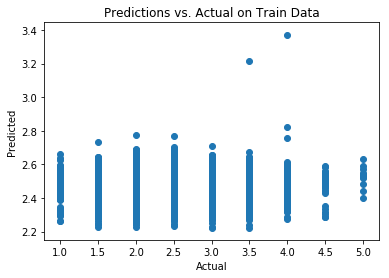

In [29]:
plt.scatter(train_Y,train_preds)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Predictions vs. Actual on Train Data')

Validation Data

Text(0.5, 1.0, 'Predictions vs. Actual on Validation Data')

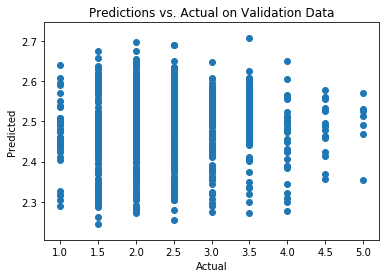

In [30]:
plt.scatter(validation_Y,validation_preds)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Predictions vs. Actual on Validation Data')

Test Data

Text(0.5, 1.0, 'Predictions vs. Actual on Test Data')

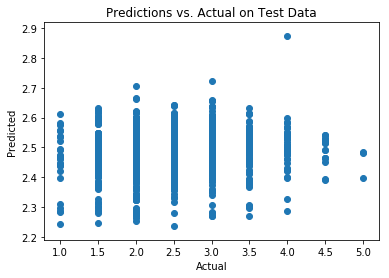

In [31]:
plt.scatter(test_Y,test_preds)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Predictions vs. Actual on Test Data')

# Data Analysis and Results

From our visualizations, we can better understand where our model struggled in predictions. As we can see, one of the main areas where the linear regression failed to come close to an accurate prediction was at higher values. Past a rating of 3.0, the model rarely ended up predicting values greater than 2.7 and lower than 2.2. This meant that in cases where the actual ratings were significantly higher or lower than the top and bottom ends of this range, the model struggled to accurately make predictions. This further shows that population numbers and density along with the restaurant chain and review count are not strong features in predicting Yelp ratings. Further analysis into the suppliers of food and other quality related features could prove to potentially be more effective in predicting the Yelp ratings for a chain restaurant.

# Ethics and Privacy

As seen in our repository, when downloading the Yelp dataset, we are agreeing to Yelp's Dataset Terms of Use. Being able to access the data does not mean it is ethical to use the data. For example, taking into consideration of the dataset and how we performed our linear regression, notice how certain features were not used, such as the address, city, state, longitude, latitude of the particular location of the restaurant was not used. If we used these features mentioned above, it can interfere with the privacy of the Yelp reviewers, which can be seen as unethical. Our project was mainly focused on the restaurants themselves rather than the specifics of the people who gave those restaurants the reviews. This is all very publicized information and is ethical for use in research. It also maintains the privacy of the people who reviewed the chains.

Another aspect of the ethics of data is data validity and the accuracy of the data. For our Yelp dataset, we removed instances of where the population and density are null. This infers that if the population is null, then the density will be null as well. By excluding records with missing values such as null values, it can have an impact on our analytical results, and can lead to amplifying bias. 

We also have to think about who is training the model. With the Yelp dataset we used, we were immediately based around 11 metropolitan areas, which could bias the data. In addition, we also used the population data from SimpleMaps. However, we used the free version of this dataset which had data for 10,000 less ZIP codes than the full dataset. This did not have a large impact on the amount of data we used on our final correlation and linear regression analysis, it is still something that we believe should be mentioned.

# Conclusion and Discussion

With our research question focusing on the given data from Yelp regarding the chain of restaurants and ratings for each chain, we want to see if we can predict the rating a chain will receive based on geographical and population data. By performing a multiple linear regression, and with the use of our correlation analysis and linear regression analysis, we have concluded that we fail to reject the null hypothesis. The features of population and population density, the chain restaurant name, and review count do not have a significant impact on the Yelp rating that was received for that particular fast food chain. Through our findings, this concludes that there is no correlation between the population, population density and the ratings a chain receives. 

One of the major limitations to our project was the scope of the Yelp reviews dataset. The Yelp dataset does not entail the entirety of the United States. In fact, a vast portion of the United States is not represented by this dataset. As a result, the data only captures about 11 metropolitan areas which not very representative of the country as a whole. While the results may represent the results of a similar study carried out on the whole country, it must still be noted that the data used in this project, both for Yelp and for population, were severely limited due to the scope of our Yelp dataset.

Limitations to our project includes how we took out some null values. There were some missing values in the dataset, and that can limit its usability for the overall model. It would be interesting to look at the scope of our dataset over time, since the population can change over time, and by that we can keep improving and updating our model. In addition, we could not find any information regarding the suppliers for each branch of these chain restaurants. The suppliers of the chains could be indicative of the quality of the food served at these restaurants. Quality can potentially be a better indicator of ratings than population data. It would be insightful to look into that relationship to see if it has any effects on predicting the rating of a chain restaurant.

In regards to population, an interesting perspective to look into would be traffic through the zip codes. How many visitors does that town get? How many people pass through it every year? While it would be hard to gather this data, it could be interesting to look into the effects that these statistics have, or if they even have any effects, in relation to the number of stars a chain restaurant receives.

# Contributions

Rakesh Senthilvelan - Data Cleaning, Data Visualization, Data Analysis & Results

Kayla Monnette - Overview, Research Question, Background & Prior Work

Geon Yoo - Hypothesis and Datasets

Fion Quach - Ethics and Privacy, Conclusion and Discussion